In [1]:
import requests

In [22]:
url = 'https://gazoo.com/pages/contents/article/daily/200927/02.jpg'
url = 'https://lh3.googleusercontent.com/proxy/R9XvmS0CqJ-4DaLqerGtk0G8MsMlI31cXR1aHesZAcKijQakuWi3FOosRw579lsfkDbFRpDSwakBYSlqnwMbFJJ7Hb452KLTiKvQ6Gm8ClknoOXH'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQBUwcf83w-6RTa7c220-2_s-eORACevh1Sug&usqp=CAU'
url = 'https://image.jimcdn.com/app/cms/image/transf/none/path/s7cfdda61af6324b3/image/i1d0dad2792e6bca4/version/1368689546/image.jpg'
url = 'https://www.eyesglass.jp/img/nightdrive-02.jpg'
url = 'https://sport-car.akakagemaru.info/wp-content/uploads/2015/04/50m0063.jpg'
url = 'https://i1.wp.com/glassfactory-shop.jp/blog/wp-content/uploads/2020/07/images-1.jpeg?fit=640%2C480&ssl=1'
url = 'https://cdn.snsimg.carview.co.jp/minkara/userstorage/000/041/724/316/c73361d3a5.jpg?ct=ae52d8077629'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTWtLc7wEuDiGP3FQoP2ZMdQPbUwSceBAb0tQ&usqp=CAU'
file_name = "test.jpg"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as aaa:
    aaa.write(image)

CPU times: user 44.4 ms, sys: 1.6 ms, total: 46 ms
Wall time: 48.9 ms


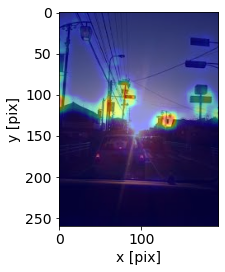

In [23]:
%%time
import cv2
import numpy  as np
from matplotlib import pyplot as plt

i = cv2.imread('test.jpg')

# サリエンシーディテクション
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
bool, map = saliency.computeSaliency(i)
i_saliency = (map * 255).astype("uint8")

# matplotlibの表示に合わせてRGBの順番に色を並び替える。
i = cv2.cvtColor(i, cv2.COLOR_BGR2RGBA)
i[:, :, 3] = 150

# ここからグラフ設定
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
# 画像をプロット
ax1.imshow(i_saliency, cmap='jet')
ax1.imshow(i)
 
# 軸のラベルを設定する。
ax1.set_xlabel('x [pix]')
ax1.set_ylabel('y [pix]')
 
# レイアウト
fig.tight_layout()


In [4]:
! pip install youtube-dl

In [5]:
# ! youtube-dl https://www.youtube.com/watch?v=JFel0ofusRU
# ! youtube-dl https://www.youtube.com/watch?v=U49oUM3tcpA
! youtube-dl https://www.youtube.com/watch?v=BHkBIfwuVvk

[youtube] BHkBIfwuVvk: Downloading webpage
[download] 2017年 １年間 まとめ ドライブレコーダー ドラレコ （ Event data recorder ）-BHkBIfwuVvk.mkv has already been downloaded and merged


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


CPU times: user 206 ms, sys: 31.1 ms, total: 237 ms
Wall time: 225 ms


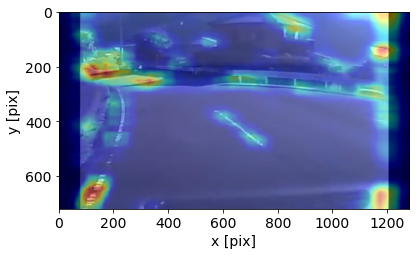

In [6]:
%%time
import cv2
import numpy  as np
from matplotlib import pyplot as plt

file_path = 'input.mp4'
file_path = 'input.mkv'
cap = cv2.VideoCapture(file_path)
ret, i = cap.read()

# サリエンシーディテクション
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
bool, map = saliency.computeSaliency(i)
i_saliency = (map * 255).astype("uint8")

# matplotlibの表示に合わせてRGBの順番に色を並び替える。
i = cv2.cvtColor(i, cv2.COLOR_BGR2RGBA)
i[:, :, 3] = 150

# ここからグラフ設定
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
# 画像をプロット
ax1.imshow(i_saliency, cmap='jet')
ax1.imshow(i)
 
# 軸のラベルを設定する。
ax1.set_xlabel('x [pix]')
ax1.set_ylabel('y [pix]')
 
# レイアウト
fig.tight_layout()


<class 'numpy.ndarray'>


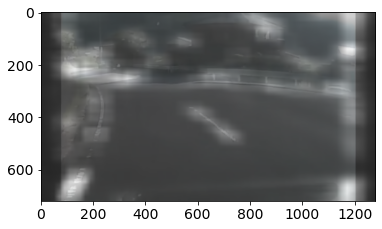

In [7]:
import cv2
import numpy as np
from PIL import Image

# 画像のオーバーレイ
def overlayImage(src, overlay, location):
    overlay_height, overlay_width = overlay.shape[:2]

    # 背景をPIL形式に変換
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    pil_src = Image.fromarray(src)
    pil_src = pil_src.convert('RGBA')

    # オーバーレイをPIL形式に変換
    overlay = cv2.cvtColor(overlay, cv2.COLOR_BGRA2RGBA)
    pil_overlay = Image.fromarray(overlay)
    pil_overlay = pil_overlay.convert('RGBA')

    # 画像を合成
    pil_tmp = Image.new('RGBA', pil_src.size, (255, 255, 255, 0))
    pil_tmp.paste(pil_overlay, location, pil_overlay)
    result_image = Image.alpha_composite(pil_src, pil_tmp)

    # OpenCV形式に変換
    return cv2.cvtColor(np.asarray(result_image), cv2.COLOR_RGBA2BGRA)

# 画像のオーバーレイ
image = overlayImage(cv2.cvtColor(i_saliency, cv2.COLOR_GRAY2RGB), i, (0, 0))
print(type(image))
plt.imshow(image)

In [8]:
%%time

file_path = 'input.mp4'
file_path = 'input.mkv'
cap = cv2.VideoCapture(file_path)
ret, i = cap.read()

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) 
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
fps = int(cap.get(cv2.CAP_PROP_FPS))

# fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video  = cv2.VideoWriter('saliency.mp4', fourcc, fps, (width, height))

while(cap.isOpened()):
  ret, i = cap.read()
  if ret:
    # サリエンシーディテクション
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    bool, map = saliency.computeSaliency(i)
    i_saliency = (map * 255).astype("uint8")

    # matplotlibの表示に合わせてRGBの順番に色を並び替える。
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGBA)
    i[:, :, 3] = 175

    image = overlayImage(cv2.cvtColor(i_saliency, cv2.COLOR_GRAY2RGB), i, (0, 0))
    image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    video.write(image)
  else:
    break

video.release()
cap.release()

CPU times: user 32min 10s, sys: 1min 29s, total: 33min 39s
Wall time: 25min 31s


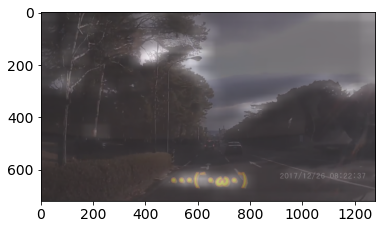

In [9]:
plt.imshow(image)

In [ ]:
! ls -lh

In [ ]:
!ffmpeg -i saliency.mp4 -vcodec vp9 saliency_.mp4

from IPython.display import HTML
import base64
import io

def play(file_path):
    video = io.open(file_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return(HTML(data='''<video width="320" height="240" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii'))))

play('saliency_.mp4')

In [61]:
! ls -lh

total 4.0M
-rw-r--r-- 1 root root  47K Nov 10 11:51  Lena.jpg
-rw-r--r-- 1 root root 1.5M Nov 10 12:06  saliency.mp4
drwxr-xr-x 1 root root 4.0K Nov  6 17:30  sample_data
-rw-r--r-- 1 root root 7.3K Nov 10 11:58  test.mp4
-rw-r--r-- 1 root root 1.3M Nov 10 10:01  test_video.mp4
-rw-r--r-- 1 root root 1.3M Nov 10 11:16 'ドライブレコーダー 事故寸前。漫然運転で危なかった。-JFel0ofusRU.mp4'


In [60]:
! pip install ffmpeg-python
import ffmpeg as fp
stream = fp.input("img_dir/%06d.jpg")
stream = fp.output(stream, "video.mp4")
​
fp.run(stream)

SyntaxError: ignored

In [35]:
img = cv2.imread('Lena.jpg')
width = img.shape[1]
height = img.shape[0]

count = 0

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')

video  = cv2.VideoWriter('test.mp4', fourcc, fps, (width, height))

while(count<100):
  video.write(img)
  count = count + 1
  
video.release()

In [36]:
! ls -lh

total 2.9M
-rw-r--r-- 1 root root  47K Nov 10 11:51  Lena.jpg
-rw-r--r-- 1 root root  258 Nov 10 11:56  saliency.mp4
drwxr-xr-x 1 root root 4.0K Nov  6 17:30  sample_data
-rw-r--r-- 1 root root 434K Nov 10 11:58  test.mp4
-rw-r--r-- 1 root root 1.3M Nov 10 10:01  test_video.mp4
-rw-r--r-- 1 root root 1.3M Nov 10 11:16 'ドライブレコーダー 事故寸前。漫然運転で危なかった。-JFel0ofusRU.mp4'


In [37]:
!ffmpeg -i test.mp4 -vcodec vp9 test.mp4

from IPython.display import HTML
import base64
import io

def play(file_path):
    video = io.open(file_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return(HTML(data='''<video width="320" height="240" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii'))))

play('test.mp4')

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib